In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

import ipywidgets as widgets

import smopy

pd.options.display.max_rows = 260
%matplotlib inline

In [2]:
ls

DV_data.csv                DV_program_analysis.ipynb  README.md


In [3]:
data = pd.read_csv('DV_data.csv')
data.sort_values('City', inplace=True)

In [4]:
print len(data)
data.head()

256


,City,Agency,Language,Website,fees listed on website,Address,Lat_Long,Registration_min,Registration_max,Other_costs,Class_min,Class_max,Veterans_only,Restrictions,Data_issue,Notes
0,Arcadia,4 Real Solutions Human Service Agency,English,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
1,Arcadia,4 Real Solutions Human Service Agency,Spanish,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
2,Arcadia,4 Real Solutions Human Service Agency,Chinese,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
3,Arcadia,Win-Win Relationship Learning Center,English,no,no,"66 W Duarte Rd, Arcadia, CA 91007","34.128777, -118.034497",40,40,0.0,18,20.0,False,NaN,NaN,NaN
4,Arcadia,Win-Win Relationship Learning Center,Chinese,no,no,"66 W Duarte Rd, Arcadia, CA 91007","34.128777, -118.034497",40,40,0.0,20,30.0,False,NaN,NaN,NaN


In [5]:
data['Lat'] = data['Lat_Long'].str.split(',').apply(lambda x: float(x[0]))
data['Long'] = data['Lat_Long'].str.split(',').apply(lambda x: float(x[1]))

In [6]:
data['Registration_min'] = np.where(data['Registration_min'].str.startswith("?"), np.nan, data['Registration_min'])
data['Registration_min'] = data['Registration_min'].astype(float)
data['Registration_max'] = np.where(data['Registration_max'].str.startswith("?"), np.nan, data['Registration_max'])
data['Registration_max'] = data['Registration_max'].astype(float)
# data['Other_costs'] = np.where(data['Other_costs'].str.startswith("?"), np.nan, data['Other_costs'])
data['Class_min'] = np.where(data['Class_min'].str.startswith("?"), np.nan, data['Class_min'])
data['Class_min'] = data['Class_min'].astype(float)
data['Other_costs'] = data['Other_costs'].fillna(0)
# data['Class_max'] = np.where(data['Class_max'].str.startswith("?"), np.nan, data['Class_max'])

data['Website'] = data['Website'].str.lower() == 'yes'
data['fees listed on website'] = data['fees listed on website'].str.lower() == 'yes'

In [7]:
no_nulls = data.dropna(subset=['Class_min'])

languages = no_nulls['Language'].unique().tolist()

all_languages = data['Language'].unique().tolist()

print(languages)
print(all_languages)

['English', 'Chinese', 'Spanish', 'Armenian', 'Mandarin', 'Cantonese', 'Korean', 'Farsi', 'Portuguese', 'ASL', 'Russian']
['English', 'Spanish', 'Chinese', 'Armenian', 'Mandarin', 'Cantonese', 'Korean', 'Farsi', 'Russian', 'Vietnamese', 'Cambodian', 'Tagalog', 'Portuguese', 'Urdu', 'Punjabi', 'Hindu', 'ASL']


In [8]:
num_sessions = 52

# Some classes will only do the min cost of $10 for three months, have Data_issue = '10-for-3'
data['min_total_cost'] = data['Registration_min'].astype(float) + data['Other_costs'] + \
    np.where(data['Data_issue'] == '10-for-3', 12*data['Class_min'] + (num_sessions - 12)*data['Class_max'], num_sessions*data['Class_min'])
data['regular_total_cost'] = data['Registration_max'] + data['Other_costs'] + num_sessions*data['Class_max']

## Plotting locations of programs

In [9]:
latMin = 33.75 # data['Lat'].min() ~33.75
latMax = 34.8 # data['Lat'].max() ~34.75
longMin = -118.9 # data['Long'].min() ~-118.8
longMax = -117.6 # data['Long'].max() ~-117.7

Lowered zoom level to keep map size reasonable. (z = 9)


Text(0.5,1,u'LA County DV programs')

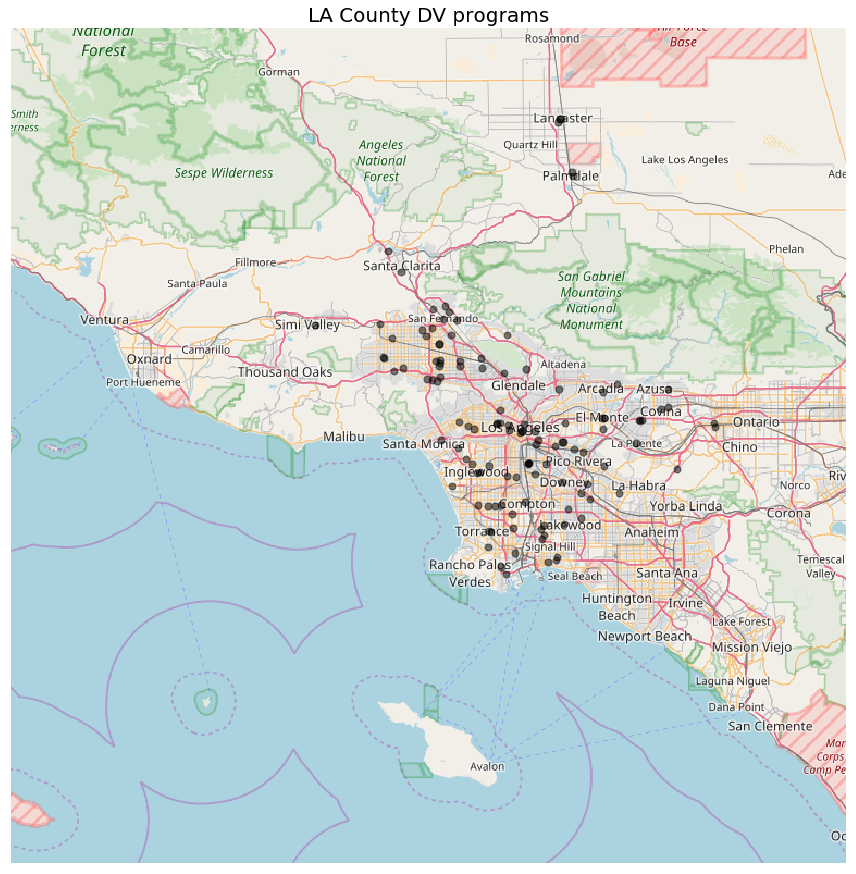

In [10]:
unique_programs = no_nulls[['Lat', 'Long']].drop_duplicates()

smap = smopy.Map((latMin, longMin, latMax, longMax))
x, y = smap.to_pixels(unique_programs['Lat'], unique_programs['Long'])
ax = smap.show_mpl(figsize=(12, 12))
ax.plot(x, y, 'ok', ms=7, alpha=0.5)
ax.set_title("LA County DV programs", fontsize=20)

## List of program costs by language

In [11]:
prog_lang = data[['Agency', 'City', 'min_total_cost', 'Language']].dropna()

def display_sorted_cost_by_lang(language):
    prog_lang2 = prog_lang[prog_lang['Language'] == language].copy()
    prog_lang2.sort_values(by='min_total_cost', ascending=True, inplace=True)
    return prog_lang2

interact(display_sorted_cost_by_lang, language=languages)

A Jupyter Widget

<function __main__.display_sorted_cost_by_lang>

In [12]:
display_sorted_cost_by_lang("English")

,Agency,City,min_total_cost,Language
48,East LA Vet Center,East Los Angeles,0.0,English
64,Dept of Veterans Affairs,Gardena,0.0,English
212,Dept of Veteran Affairs,Sherman Oaks,0.0,English
221,Safety Alliance Group,Sylmar,260.0,English
172,Safety Alliance Group -,Pacoima,260.0,English
183,Claret Hispanic Center,Pico Rivera,280.0,English
146,Weingart Center,Los Angeles,285.0,English
39,Southern California Alcohol and Drug Program,Downey,310.0,English
60,BHS - South Bay Family Recovery Center,Gardena,335.0,English
9,Family Service Agency of Burbank,Burbank,335.0,English


### Minimum cost of 52 week program per city, assuming client pays minimum cost per program

N.B. This does not include veterans programs.

In [13]:
def get_per_city_min(language):
    per_city_min = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'min_total_cost']].dropna().groupby('City').min()
    return per_city_min

interact(get_per_city_min, language=languages)

A Jupyter Widget

<function __main__.get_per_city_min>

In [14]:
get_per_city_min("English")

,min_total_cost
City,
Arcadia,976.0
Bell,1085.0
Bellflower,1395.0
Beverly Hills,2496.0
Burbank,335.0
Canoga Park,820.0
Carson,820.0
Cerritos,1100.0
Chatswoth,520.0


In [15]:
get_per_city_min("Spanish")

,min_total_cost
City,
Bell,1085.0
Burbank,335.0
Canoga Park,820.0
Carson,1090.0
Cerritos,1620.0
Culver City,1350.0
East Los Angeles,1038.0
El Monte,870.0
Encino,1080.0


### Minimum cost of 52 week program per city, assuming client pays full cost for program.

N.B. This does not include veterans programs.

In [16]:
def get_per_city_reg(language):
    per_city_reg = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'regular_total_cost']].dropna().groupby('City').min()
    return per_city_reg

interact(get_per_city_reg, language=languages)

A Jupyter Widget

<function __main__.get_per_city_reg>

In [17]:
get_per_city_reg("English")

,regular_total_cost
City,
Arcadia,1080.0
Bell,1345.0
Bellflower,2695.0
Beverly Hills,2600.0
Burbank,2155.0
Canoga Park,1060.0
Carson,1350.0
Cerritos,1620.0
Chatswoth,1340.0


In [18]:
get_per_city_reg("Spanish")

,regular_total_cost
City,
Bell,1345.0
Burbank,2155.0
Canoga Park,1340.0
Carson,1350.0
Cerritos,1620.0
Culver City,1350.0
East Los Angeles,1375.0
El Monte,1090.0
Encino,1600.0


### Median cost of a 52 week program per city.

N.B. This does not include veterans programs.

In [19]:
def get_per_city_avg(language):
    per_city_average = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'regular_total_cost']].dropna().groupby('City').median().round(2)
    return per_city_average

interact(get_per_city_avg, language=languages)

A Jupyter Widget

<function __main__.get_per_city_avg>

In [20]:
get_per_city_avg("English")

,regular_total_cost
City,
Arcadia,1080.0
Bell,1345.0
Bellflower,2695.0
Beverly Hills,2600.0
Burbank,2155.0
Canoga Park,1200.0
Carson,1371.0
Cerritos,1620.0
Chatswoth,1465.0


In [21]:
get_per_city_avg("Spanish")

,regular_total_cost
City,
Bell,1345.0
Burbank,2155.0
Canoga Park,1359.5
Carson,1350.0
Cerritos,1620.0
Culver City,1417.0
East Los Angeles,1484.0
El Monte,1370.0
Encino,1600.0


## Veterans' programs

All veterans programs are free, but for veterans only. There are only 3 veterans programs in the LA area.

In [22]:
vets = data[data['Veterans_only']][['City', 'Agency', 'Address', 'Lat', 'Long']]
vets[['City', 'Agency', 'Address']]

,City,Agency,Address
48,East Los Angeles,East LA Vet Center,"5400 E Olympic Blvd, Commerce, CA 90022"
64,Gardena,Dept of Veterans Affairs,"1045 W Redondo Beach Blvd, Gardena, CA 90247"
212,Sherman Oaks,Dept of Veteran Affairs,"16111 Plummer St, North Hills, CA 91343"


Lowered zoom level to keep map size reasonable. (z = 9)


Text(0.5,1,u"Veterans' programs")

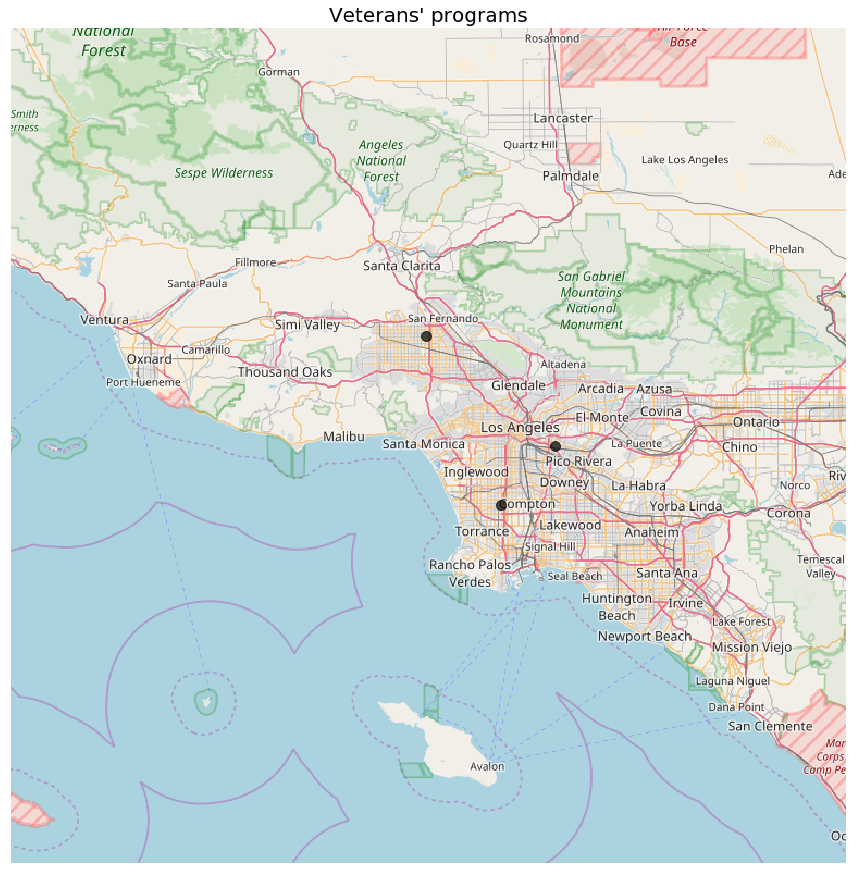

In [23]:
smap = smopy.Map((latMin, longMin, latMax, longMax))
x, y = smap.to_pixels(vets['Lat'], vets['Long'])
ax = smap.show_mpl(figsize=(12, 12))
ax.plot(x, y, 'ok', ms=10, alpha=0.7)
ax.set_title("Veterans' programs", fontsize=20)

## Cost plot

Plotting language programs by cost.

N.B. Several programs are missing cost information. They are indicated by black X's in the plots below.

In [24]:
def plot_program_min(language):
    program_min = data[data['Language'] == language][
        ['Lat', 'Long', 'min_total_cost']].dropna()
    smap = smopy.Map((latMin, longMin, latMax, longMax))
    x, y = smap.to_pixels(program_min['Lat'], program_min['Long'])
    ax = smap.show_mpl(figsize=(14, 14))
    cax = ax.scatter(x, y, c=program_min['min_total_cost'], cmap=plt.get_cmap('inferno'), s=150, alpha=0.8, vmin=0, vmax=3500)
    
    program_min_nulls  = data[np.logical_and(data['Language'] == language, pd.isnull(data['regular_total_cost']))][
        ['Lat', 'Long', 'min_total_cost']]
    x, y = smap.to_pixels(program_min_nulls['Lat'], program_min_nulls['Long'])
    ax.scatter(x, y, marker='x', color='k', s=100)
    
    ax.set_title("%s program total cost, minimum" % language, fontsize=20)
    cbar = plt.colorbar(cax, shrink=0.75, format='$%d')
    cbar.ax.tick_params(labelsize=16)

interact(plot_program_min, language=all_languages)

A Jupyter Widget

<function __main__.plot_program_min>

In [25]:
def plot_program_reg(language):
    program_min = data[data['Language'] == language][
        ['Lat', 'Long', 'regular_total_cost']].dropna()
    smap = smopy.Map((latMin, longMin, latMax, longMax))
    x, y = smap.to_pixels(program_min['Lat'], program_min['Long'])    
    ax = smap.show_mpl(figsize=(14, 14))
    cax = ax.scatter(x, y, c=program_min['regular_total_cost'], cmap=plt.get_cmap('inferno'), s=150, alpha=0.8, vmin=0, vmax=8000)
    
    program_min_nulls  = data[np.logical_and(data['Language'] == language, pd.isnull(data['regular_total_cost']))][
        ['Lat', 'Long', 'regular_total_cost']]
    x, y = smap.to_pixels(program_min_nulls['Lat'], program_min_nulls['Long'])
    ax.scatter(x, y, marker='x', color='k', s=100)
    
    ax.set_title("%s program total cost, regular" % language, fontsize=20)
    cbar = plt.colorbar(cax, shrink=0.75, format='$%d')
    cbar.ax.tick_params(labelsize=16)

interact(plot_program_reg, language=all_languages)

A Jupyter Widget

<function __main__.plot_program_reg>

## Number of programs by language

In [26]:
count_by_lang = data[['Language', 'City']].groupby('Language').count()
count_by_lang.columns = ['Count']

min_cost_by_lang = data[['Language', 'min_total_cost']].groupby('Language').min()
min_cost_by_lang.columns = ['Minimum cost']

max_cost_by_lang = data[['Language', 'regular_total_cost']].groupby('Language').max()
max_cost_by_lang.columns = ['Maximum cost']

lang_count_cost = pd.merge(count_by_lang, min_cost_by_lang, left_index=True, right_index=True, how='outer')
lang_count_cost = pd.merge(lang_count_cost, max_cost_by_lang, left_index=True, right_index=True, how='outer')

In [27]:
lang_count_cost.fillna('')

,Count,Minimum cost,Maximum cost
Language,,,
ASL,1,2650,2650
Armenian,8,1040,1880
Cambodian,1,,
Cantonese,1,3430,3430
Chinese,3,1080,1660
English,137,0,7825
Farsi,9,1080,3442.5
Hindu,1,,
Korean,3,35,2130


## Final things

### Percentage of programs with fees on website

In [28]:
data_website = data[['City', 'Agency', 'Website', 'fees listed on website']].drop_duplicates()
num_total = len(data_website)
num_with_website = float(len(data_website[data_website['Website']]))
fees_on_website = float(len(data_website[np.logical_and(data_website['Website'], data_website['fees listed on website'])]))
print "%.2f%% of DV programs have websites." % (100.0*num_with_website/num_total)
print "%.2f%% of DV programs with websites list their fees online." % (100.0*fees_on_website/num_with_website)

70.29% of DV programs have websites.
14.43% of DV programs with websites list their fees online.
